In [1]:
import requests
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import time
from sklearn.model_selection import train_test_split

# facebook/react

## Data Collection

In [2]:
BASE_URL = "https://api.github.com/search/issues"
query = "repo:facebook/react+is:issue+is:closed+javascript+OR+js"
state = "closed"
per_page = 100
final_res = []
# Using your TOKEN to send the request
TOKEN = ""
# Set up the headers with the authentication token
headers = {
    'Authorization': f'Bearer {TOKEN}',
    'X-GitHub-Api-Version': '2022-11-28',
    "Accept": "application/vnd.github+json"
}

In [ ]:
# get all the issue data
# for year in ['2019','2020','2021','2022','2023']:
#     new_query = f'{query}+created:{year}-01-01..{year}-12-31'
        
#     for i in range(1, 10):
#         res = requests.get(f'{BASE_URL}?q={new_query}&per_page={per_page}&page={i}', headers=headers)
#         json_res = res.json()['items']
#         if json_res != []:
#             final_res += json_res
#         else:
#             break
#         time.sleep(3)

In [2]:
file_dir = '../data/facebook_react.json'

In [ ]:
# # Save to data
# with open(file_dir, "w") as outfile:
#     json.dump(final_res, outfile)

In [17]:
df = pd.read_json(file_dir)
df

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,score
0,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/16592,486132886,MDU6SXNzdWU0ODYxMzI4ODY=,16592,React@16.9 block `javascript:void(0);`,...,2023-09-24 23:31:02+00:00,2019-08-28 03:57:16+00:00,NONE,None,"```\r\n<a href=""javascript:void(0);""></a>\r\n`...",{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,1
1,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/16295,476935801,MDU6SXNzdWU0NzY5MzU4MDE=,16295,useReducer dispatch calls reduce twice,...,2023-11-09 20:58:58+00:00,2019-08-15 12:54:54+00:00,NONE,None,**Do you want to request a *feature* or report...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,1
2,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/15315,429028691,MDU6SXNzdWU0MjkwMjg2OTE=,15315,Invalid hook call. Hooks can only be called in...,...,2023-11-14 07:13:09+00:00,2019-04-11 16:18:39+00:00,NONE,None,"Hi all, I am new to react and I am trying to ...",{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,1
3,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/17207,513871564,MDU6SXNzdWU1MTM4NzE1NjQ=,17207,Bug: react-devtools TypeError: Do not know how...,...,2023-10-11 09:16:24+00:00,2019-12-04 15:53:01+00:00,CONTRIBUTOR,None,**What is the current behavior?**\r\n\r\nTypeE...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,1
4,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/15647,443936677,MDU6SXNzdWU0NDM5MzY2Nzc=,15647,useEffect causes 'callback is not a function' ...,...,2023-07-17 08:07:05+00:00,2019-05-14 16:52:44+00:00,NONE,None,**Do you want to request a *feature* or report...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://api.github.com/repos/facebook/react/is...,https://github.com/facebook/react/issues/26128,1576274228,I_kwDOAJy2Ks5d9Ak0,26128,Bug(@next): legacy `ReactDOM.render` crashes w...,...,2023-02-09 12:35:26+00:00,2023-02-09 12:35:25+00:00,COLLABORATOR,None,<!--\r\n Please provide a clear and concise d...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react/is...,NaN,completed,

In [18]:
df[['title', 'body']] = df[['title', 'body']].fillna('')
df = df[df['body'] != '']

In [19]:
df[['title','body']]

,title,body
0,React@16.9 block `javascript:void(0);`,"```\r\n<a href=""javascript:void(0);""></a>\r\n`..."
1,useReducer dispatch calls reduce twice,**Do you want to request a *feature* or report...
2,Invalid hook call. Hooks can only be called in...,"Hi all, I am new to react and I am trying to ..."
3,Bug: react-devtools TypeError: Do not know how...,**What is the current behavior?**\r\n\r\nTypeE...
4,useEffect causes 'callback is not a function' ...,**Do you want to request a *feature* or report...
...,...,...
1990,Bug(@next): legacy `ReactDOM.render` crashes w...,<!--\r\n Please provide a clear and concise d...
1991,Bug: Conditional hooks undetected by `eslint-p...,React version: 18.2.0\r\n\r\nI'm specifically ...
1992,Bug: Error due to `serverSnapshot` and `snapsh...,<!--\r\n Please provide a clear and concise d...
1993,Bug: using google translate on a page then rem...,<!--\r\n Please provide a clear and concise d...


## Data Cleaning

In [4]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if (token not in stopwords.words('english')) and (len(token) < 20)]
    str_tokens = ' '.join(tokens)
    return str_tokens

In [21]:
df['processed_title'] = df['title'].apply(preprocess_text)
df['processed_body'] = df['body'].apply(preprocess_text)
df['processed_text'] = df.apply(lambda row: f'Title: {row["processed_title"]}; Body: {row["processed_body"]}', axis=1)

/var/folders/yl/gbccy_r96txclszxnfkmq8bw0000gn/T/ipykernel_36046/939005655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_title'] = df['title'].apply(preprocess_text)
/var/folders/yl/gbccy_r96txclszxnfkmq8bw0000gn/T/ipykernel_36046/939005655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_body'] = df['body'].apply(preprocess_text)
/var/folders/yl/gbccy_r96txclszxnfkmq8bw0000gn/T/ipykernel_36046/939005655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

## BERT embeddings

In [22]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [23]:
# Generate BERT embeddings for text data
embeddings = []
for text in df['processed_text']:
    tokenized_text = tokenizer(text, return_tensors='pt', truncation=True)
    with torch.no_grad():
        outputs = model(**tokenized_text)
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

# TFIDF Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['processed_text'])

# Clustering

## Using BERT Embedding

In [24]:
# Convert embeddings to numpy array
embedding_matrix = np.array(embeddings)

# Perform K-means clustering on the embeddings
num_clusters = 7  # Adjust based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding_matrix)

In [25]:
# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

/var/folders/yl/gbccy_r96txclszxnfkmq8bw0000gn/T/ipykernel_36046/2197561255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = cluster_labels


In [26]:
df[['processed_text', 'cluster_label']]

,processed_text,cluster_label
0,Title: react block javascriptvoid; Body: hrefj...,4
1,Title: usereducer dispatch calls reduce twice;...,5
2,Title: invalid hook call hooks called inside b...,0
3,Title: bug reactdevtools typeerror know serial...,5
4,Title: useeffect causes callback function exce...,6
...,...,...
1990,Title: bugnext legacy reactdomrender crashes r...,5
1991,Title: bug conditional hooks undetected inside...,6
1992,Title: bug error due serversnapshot snapshot m...,5
1993,Title: bug using google translate page removin...,5


## Using TFIDF

In [9]:
# Perform K-means clustering on the embeddings
num_clusters = 7  # Adjust based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [10]:
# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

/var/folders/yl/gbccy_r96txclszxnfkmq8bw0000gn/T/ipykernel_36046/2197561255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = cluster_labels


In [11]:
df[['processed_text', 'cluster_label']]

,processed_text,cluster_label
0,Title: react block javascriptvoid; Body: hrefj...,4
1,Title: usereducer dispatch calls reduce twice;...,6
2,Title: invalid hook call hooks called inside b...,4
3,Title: bug reactdevtools typeerror know serial...,6
4,Title: useeffect causes callback function exce...,6
...,...,...
1990,Title: bugnext legacy reactdomrender crashes r...,0
1991,Title: bug conditional hooks undetected inside...,4
1992,Title: bug error due serversnapshot snapshot m...,0
1993,Title: bug using google translate page removin...,0


## Analysis of Clusters

In [2]:
from keybert import KeyBERT

In [29]:
df = pd.read_csv('../data/facebook_react_cluster_1.csv')
df['processed_title'] = df['title'].apply(preprocess_text)

In [30]:
num_clusters = df['cluster_label'].nunique()

In [31]:
kw_model = KeyBERT()

keywords_per_cluster = {}
for cluster_label in range(num_clusters):
    cluster_samples = df[df['cluster_label'] == cluster_label]['processed_title'].tolist()

    # Combine all processed_text within the cluster
    combined_text = ' '.join(cluster_samples)
    
    keywords = kw_model.extract_keywords(combined_text, keyphrase_ngram_range=(1, 4))

    # Add keywords to the dictionary
    keywords_per_cluster[cluster_label] = keywords

In [32]:
# Display the clusters and associated keywords
for cluster_label, keywords in keywords_per_cluster.items():
    print(f"\nCluster {cluster_label } Keywords: {keywords}")


Cluster 0 Keywords: [('commit reactdevtools error node', 0.5875), ('react devtools error getcommittree', 0.5828), ('commit tree react', 0.5823), ('jsx error commit tree', 0.5718), ('react devtools error commit', 0.567)]

Cluster 1 Keywords: [('component react memory leak', 0.6855), ('component bug react', 0.6453), ('memory leak react dom', 0.6432), ('react memory leak', 0.6423), ('react memory leak react', 0.6406)]

Cluster 2 Keywords: [('bug react error provide', 0.5963), ('bug react typescript support', 0.594), ('bug react dev', 0.591), ('error react support', 0.582), ('components error react', 0.581)]

Cluster 3 Keywords: [('bug setstate rerenders component', 0.5654), ('bug react longer supports', 0.5651), ('bugnext legacy reactdomrender', 0.5647), ('bug setstate rerender functional', 0.5614), ('single hook bug reactdomserver', 0.5599)]

Cluster 4 Keywords: [('bug build react', 0.5703), ('bug reactdom error devtools', 0.5565), ('electron app fails load', 0.556), ('errors react deve

In [33]:
df_sorted = df.sort_values(by='cluster_label')
df_sorted

,html_url,title,body,cluster_label,processed_title
0,https://github.com/facebook/react/issues/20989,"Error: ""getCommitTree(): Unable to reconstruct...",Describe what you were doing when the bug occu...,0,error getcommittree unable reconstruct tree ro...
151,https://github.com/facebook/react/issues/19351,"Error: ""Commit tree does not contain fiber 119...",Describe what you were doing when the bug occu...,0,error commit tree contain fiber bug react devt...
152,https://github.com/facebook/react/issues/20469,"Error: ""Commit tree does not contain fiber 673...",Describe what you were doing when the bug occu...,0,error commit tree contain fiber bug react devt...
153,https://github.com/facebook/react/issues/18691,"Error: ""Cannot read property '2' of undefined""",Describe what you were doing when the bug occu...,0,error read property undefined
154,https://github.com/facebook/react/issues/20326,"Error: ""value is undefined""",Describe what you were doing when the bug occu...,0,error value undefined
...,...,...,...,...,...
1804,https://github.com/facebook/react/issues/21799,[DevTools Bug] Commit tree does not contain fi...,### Website or app\n\nhttps://github.com/shiva...,4,devtools bug commit tree contain fiber bug rea...
1803,https://github.com/facebook/react/issues/20484,Bug: ReactDom error,![image](https://user-images.githubusercontent...,4,bug reactdom error
1802,https://github.com/facebook/react/issues/26042,ERROR TypeError: Cannot read property 'creat...,### App\r\n\r\nusing flipper dor react devtool...,4,error typeerror read property createelement un...
1808,https://github.com/facebook/react/issues/20588,"Error: ""Commit tree does not contain fiber 105...",Describe what you were doing when the bug occu...,4,error commit tree contain fiber bug react devt...


In [16]:
# df_sorted[['html_url', 'title', 'body', 'cluster_label']].to_csv('../data/facebook_react_cluster_3.csv', index = False)

In [22]:
cluster_count = df.groupby("cluster_label")["cluster_label"].count().reset_index(name="count")

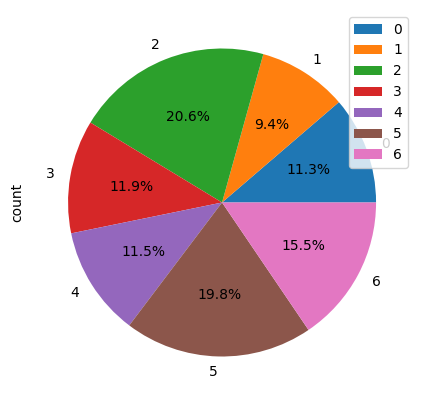

In [23]:
plot = cluster_count.plot.pie(y='count',autopct='%1.1f%%', figsize=(5, 5))

In [20]:
print(df[df['cluster_label'] == 2]['title'].tolist())

['React@16.9 block `javascript:void(0);`', 'Chrome 73 breaks wheel events', 'About ReactSharedInternals Module', 'Input type="number" fields don\'t call onChange', 'DevTools: Triggering Error Boundaries from DevTools', 'useLayoutEffect in ssr', 'React should support nbsp;', 'Misleading error description when using wrong useRef', "Can't import image dynamically in reactjs", 'Does not work on Chrome 38', 'Erroneous useEffect conditional call error', 'Is there a plugin，that can support a linter  in standardjs?', 'TypeError: Assignment to constant variable.', 'React DevTools might retain references to unmounted DOM elements (and their Fibers)', 'useContext hook - Invalid attempt to destructure non-iterable instance', 'Lint rule for hooks report error for non hook function starting by `useXXX` ', 'Suspense priority warning does not work for any hook except the first one per component', 'Allow ReactNode as a type for the child of <option/>', "Event not invoked in ShadowDom's non-root node.",

# Random select 100 issues for manual analysis

In [36]:
df_csv = pd.read_csv('../data/facebook_react_cluster.csv')

In [37]:
df_csv

,html_url,title,body,cluster_label
0,https://github.com/facebook/react/issues/20989,"Error: ""getCommitTree(): Unable to reconstruct...",Describe what you were doing when the bug occu...,0
1,https://github.com/facebook/react/issues/21280,"Error: ""Cannot read property 'isCollapsed' of ...",Describe what you were doing when the bug occu...,0
2,https://github.com/facebook/react/issues/21264,"Error: ""Cannot read property 'isCollapsed' of ...",Describe what you were doing when the bug occu...,0
3,https://github.com/facebook/react/issues/21218,"Error: ""Cannot read property 'replace' of unde...",Describe what you were doing when the bug occu...,0
4,https://github.com/facebook/react/issues/20583,Bug: Property length undefined in Profiler,React version: 17.0.1\r\n\r\nError happens wh...,0
...,...,...,...,...
1987,https://github.com/facebook/react/issues/22860,Bug: Error while runinng react app,I'm trying to run react app I got this error:\...,4
1988,https://github.com/facebook/react/issues/22612,"[DevTools Bug] Cannot add node ""1"" because a n...",\r\n![Screen Shot 2021-10-21 at 12 23 23 PM](h...,4
1989,https://github.com/facebook/react/issues/24581,"[DevTools Bug] Cannot add node ""1"" because a n...",### Website or app\n\nhttp://localhost:3000/ty...,4
1990,https://github.com/facebook/react/issues/23331,React 18 - hydration of lazy component with si...,"Hello, I'm having an issue with hydration of S...",4


In [38]:
# Step 1: Calculate the distribution of cluster labels in the original dataset
cluster_distribution = df_csv['cluster_label'].value_counts(normalize=True)

# Step 2: Determine the number of samples to be taken from each cluster based on the distribution
num_samples_per_cluster = (cluster_distribution * 100).round().astype(int)

# Step 3: Subsample from each cluster
subsamples = []
for cluster, num_samples in num_samples_per_cluster.items():
    cluster_samples = df_csv[df_csv['cluster_label'] == cluster].sample(n=num_samples, random_state=42)
    subsamples.append(cluster_samples)

# Step 4: Combine the subsamples to get the final dataset
final_samples = pd.concat(subsamples)

In [39]:
final_samples

,html_url,title,body,cluster_label
1487,https://github.com/facebook/react/issues/18686,Bug: Context value change results in rendering...,Given the following structure:\r\n\r\n```\r\n<...,3
1089,https://github.com/facebook/react/issues/16396,use-subscription causes UI tearing in some ran...,<!--\r\n Note: if the issue is about document...,3
1085,https://github.com/facebook/react/issues/16583,IE11 polyfill seems to be not working with rea...,Imported below polyfills in the index.js and u...,3
1216,https://github.com/facebook/react/issues/26429,unable to run examples in React tictactoe tuto...,ERROR: _Unable to establish connection with th...,3
1327,https://github.com/facebook/react/issues/17520,"Component test reports ""An update to ... was n...",**Do you want to request a *feature* or report...,3
...,...,...,...,...
222,https://github.com/facebook/react/issues/17592,"Error: ""Could not find node with id ""5"" in com...",Describe what you were doing when the bug occu...,0
112,https://github.com/facebook/react/issues/19988,"Error: ""Cannot read property 'isCollapsed' of ...",Describe what you were doing when the bug occu...,0
221,https://github.com/facebook/react/issues/16457,"Error: ""Could not find node with id ""6002"" in ...",PLEASE INCLUDE REPRO INSTRUCTIONS AND EXAMPLE ...,0
183,https://github.com/facebook/react/issues/20504,"Error: ""Commit tree does not contain fiber 191...",Describe what you were doing when the bug occu...,0


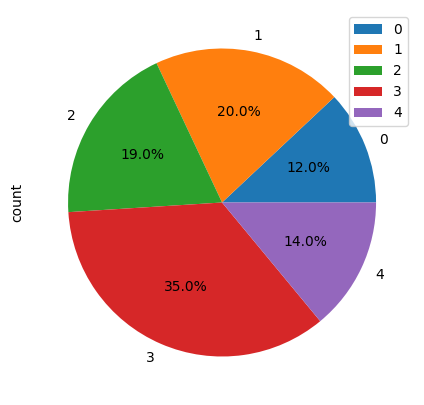

In [40]:
cluster_count = final_samples.groupby("cluster_label")["cluster_label"].count().reset_index(name="count")
plot = cluster_count.plot.pie(y='count',autopct='%1.1f%%', figsize=(5, 5))

In [42]:
# final_samples.to_csv('../data/react_samples.csv', index = False)

In [43]:
# final_samples[['html_url', 'cluster_label']].to_csv('../data/react_samples_url_only.csv', index = False)